# SVM

Bank Marketing data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y). This is a Supervised - Classification task

Our goal is to predict the output variable y - indicates whether a client will subscribe a term deposit.

## Pseudo Code
    1) Data Analysis/Understanding of the data
    2) Encoding the categorical variables
    3) Scaling of the data/Normalization of the data
    4) Shuffle the data and split the training and test data 70-30
    4) Use bagging algorithm to predict the output variable y. Analyze the results using atleast 3 performance metrics
    5) Use boosting algorithm to predict the output variable y. Analyze the results using atleast 3 performance metrics

# 1) Data Preparation/Analysis & understanding of data

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, r2_score, roc_auc_score, recall_score, roc_auc_score, roc_curve, mean_squared_error, auc
from sklearn.metrics import classification_report,confusion_matrix, precision_recall_curve, average_precision_score, cohen_kappa_score
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold, cross_val_score
from sklearn.svm import SVC
from statistics import mode
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
bmarketing_df = pd.read_csv("bank-full.csv", delimiter=';')
bmarketing_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
bmarketing_df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [4]:
bmarketing_df.y.value_counts()/len(bmarketing_df)*100

no     88.30152
yes    11.69848
Name: y, dtype: float64

In [5]:
bmarketing_df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

### Data Attributes
    - 17 columns with output feature 'y' - determines whether a client will subscribe to a term deposit. 
    - 7 Numeric fields
        age      
        balance  
        day      
        duration 
        campaign 
        pdays    
        previous 
    - Object fields
        job      
        marital  
        education
        default  
        housing  
        loan     
        contact  
        month    
        poutcome 
    - There are no null values and hence no data cleaning is required.
    - Encoding of the character fields to numeric is required to use different algorithms to predict the output variable y

In [50]:
bmarketing_df.y.value_counts()/len(bmarketing_df)*100

0    88.30152
1    11.69848
Name: y, dtype: float64

### The data is highly imbalanced with output variable y=yes with 11.7% while y=no is 88.3%
Inorder to train the imbalanced data, we either do undersampling or oversampling of the data and use SMOTE method.

In this assignment, I'm going to use different bagging and boosting algorithms as they are highly recommended for prediction of output using imbalanced data.

# 2) Encoding - Convert all categorical variables to numeric variables.

In [6]:
#Encode the categorical data
for col in bmarketing_df.columns:
    if bmarketing_df[col].dtype==object:
           bmarketing_df[col] = bmarketing_df[col].astype('category')
           bmarketing_df[col] = bmarketing_df[col].cat.codes

In [7]:
bmarketing_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0


# 3) Scaling /Normalization of the data

In [8]:
# Rescale data (between 0 and 1)
import pandas
import scipy
import numpy
from sklearn.preprocessing import MinMaxScaler
# separate array into input and output components
X = bmarketing_df.drop(['y'], axis=1).values
y = bmarketing_df['y']

min_max=MinMaxScaler(feature_range=(0,1))

X = min_max.fit_transform(X)


D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


# 4) SVM to predict the output variable 'y'

In [10]:
from sklearn import svm
### Support Vector Classifier ###
from sklearn.svm import SVC 
from sklearn.svm import LinearSVC

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## 4.1) Basic SVC classifier

In [12]:
svc_model = SVC()
svc_model.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [14]:
svc_pred = svc_model.predict(X_test)

Accuracy: 
 0.8883072839870245
Confusion Matrix: 
 [[12049     0]
 [ 1515     0]]
Classification Report: 
              precision    recall  f1-score   support

          0       0.89      1.00      0.94     12049
          1       0.00      0.00      0.00      1515

avg / total       0.79      0.89      0.84     13564



D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


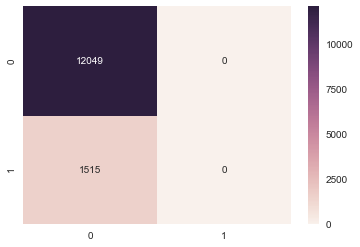

In [15]:
print('Accuracy: \n', accuracy_score(y_test, svc_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, svc_pred))
print('Classification Report: \n', classification_report(y_test, svc_pred))

sns.heatmap(confusion_matrix(y_test, svc_pred),annot=True,fmt="d")

### The precision, recall and f1-score are all 0.0 for class 1 (y=yes). This indicates the SVC kernel linear cannot make correct predictions for the output variable y 

## 4.2) Trying different SVC kernels and Linear SVC

In [18]:
C=1.0
### Support Vector Classifier ###
svc_linear = svm.SVC(kernel='linear', decision_function_shape='ovr', C=C).fit(X_train, y_train)
svc_poly = svm.SVC(kernel='poly', decision_function_shape='ovr', degree=3, C=C).fit(X_train, y_train)
svc_rbf = svm.SVC(kernel = 'rbf', decision_function_shape='ovr', gamma = 0.7, C=C).fit(X_train, y_train)
svc_sigmoid = svm.SVC(kernel = 'sigmoid', decision_function_shape='ovr' , C=C).fit(X_train, y_train)
svc_lin = svm.LinearSVC(C=1.0).fit(X_train, y_train)

In [20]:
svc_linear_pred = svc_linear.predict(X_test)
svc_poly_pred = svc_poly.predict(X_test)
svc_rbf_pred = svc_rbf.predict(X_test)
svc_sigmoid_pred = svc_sigmoid.predict(X_test)
svc_lin_pred = svc_lin.predict(X_test)

In [21]:
print('Accuracy svc_linear: \n', accuracy_score(y_test, svc_linear_pred))
print('Confusion Matrix svc_linear: \n', confusion_matrix(y_test, svc_linear_pred))
print('Classification Report svc_linear: \n', classification_report(y_test, svc_linear_pred))

Accuracy svc_linear: 
 0.8883072839870245
Confusion Matrix svc_linear: 
 [[12049     0]
 [ 1515     0]]
Classification Report svc_linear: 
              precision    recall  f1-score   support

          0       0.89      1.00      0.94     12049
          1       0.00      0.00      0.00      1515

avg / total       0.79      0.89      0.84     13564



D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [22]:
print('Accuracy svc_poly: \n', accuracy_score(y_test, svc_poly_pred))
print('Confusion Matrix svc_poly: \n', confusion_matrix(y_test, svc_poly_pred))
print('Classification Report svc_poly: \n', classification_report(y_test, svc_poly_pred))

Accuracy svc_poly: 
 0.8883072839870245
Confusion Matrix svc_poly: 
 [[12049     0]
 [ 1515     0]]
Classification Report svc_poly: 
              precision    recall  f1-score   support

          0       0.89      1.00      0.94     12049
          1       0.00      0.00      0.00      1515

avg / total       0.79      0.89      0.84     13564



D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [23]:
print('Accuracy svc_rbf : \n', accuracy_score(y_test, svc_rbf_pred))
print('Confusion Matrix svc_rbf : \n', confusion_matrix(y_test, svc_rbf_pred))
print('Classification Report svc_rbf : \n', classification_report(y_test, svc_rbf_pred))

Accuracy svc_rbf : 
 0.8959009141846063
Confusion Matrix svc_rbf : 
 [[11894   155]
 [ 1257   258]]
Classification Report svc_rbf : 
              precision    recall  f1-score   support

          0       0.90      0.99      0.94     12049
          1       0.62      0.17      0.27      1515

avg / total       0.87      0.90      0.87     13564



In [24]:
print('Accuracy svc_sigmoid : \n', accuracy_score(y_test, svc_sigmoid_pred))
print('Confusion Matrix svc_sigmoid : \n', confusion_matrix(y_test, svc_sigmoid_pred))
print('Classification Report svc_sigmoid : \n', classification_report(y_test, svc_sigmoid_pred))

Accuracy svc_sigmoid : 
 0.8891919787673253
Confusion Matrix svc_sigmoid : 
 [[12025    24]
 [ 1479    36]]
Classification Report svc_sigmoid : 
              precision    recall  f1-score   support

          0       0.89      1.00      0.94     12049
          1       0.60      0.02      0.05      1515

avg / total       0.86      0.89      0.84     13564



In [25]:
print('Accuracy svc_lin : \n', accuracy_score(y_test, svc_lin_pred))
print('Confusion Matrix svc_lin : \n', confusion_matrix(y_test, svc_lin_pred))
print('Classification Report svc_lin : \n', classification_report(y_test, svc_lin_pred))

Accuracy svc_lin : 
 0.8942052491890298
Confusion Matrix svc_lin : 
 [[11892   157]
 [ 1278   237]]
Classification Report svc_lin : 
              precision    recall  f1-score   support

          0       0.90      0.99      0.94     12049
          1       0.60      0.16      0.25      1515

avg / total       0.87      0.89      0.87     13564



## We can see that Linear Support Vector Classification and RBF kernel seem to predict better than other types of kernels 

## 4.3) Tuning the parameters for RBF kernel 

In [38]:
from sklearn.model_selection import GridSearchCV
from sklearn.utils import shuffle

# shuffle the dataset
X, y = shuffle(X, y, random_state=0)

# Split the dataset in two equal parts
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)


In [26]:
# Set the parameters by cross-validation
parameters = [{'kernel': ['rbf'],
               'gamma': [1e-4, 1e-3, 0.01, 0.1, 0.2, 0.5],
                'C': [1, 10, 100, 1000]}]

print("# Tuning hyper-parameters")
print()

rbf_clf = GridSearchCV(svm.SVC(), parameters, cv=5)
rbf_clf_model = rbf_clf.fit(X_train, y_train)


# Tuning hyper-parameters



In [27]:
print("Best parameters set found on development set:")
print()
print(rbf_clf.best_params_)

Best parameters set found on development set:

{'C': 1000, 'gamma': 0.2, 'kernel': 'rbf'}


In [28]:
rbf_clf.best_estimator_

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.2, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [30]:
rbf_clf.best_score_

0.8979002005426449

In [39]:
rbf_clf_best = svm.SVC(kernel='rbf', gamma= 0.2, C=1000)
rbf_clf_best_model = rbf_clf_best.fit(X_train, y_train)

In [40]:
rbf_clf_best_pred = rbf_clf_best_model.predict(X_test)

In [41]:
print('Accuracy : \n', accuracy_score(y_test, rbf_clf_best_pred))
print('Confusion Matrix : \n', confusion_matrix(y_test, rbf_clf_best_pred))
print('Classification Report : \n', classification_report(y_test, rbf_clf_best_pred))

Accuracy : 
 0.8959746387496313
Confusion Matrix : 
 [[11721   229]
 [ 1182   432]]
Classification Report : 
              precision    recall  f1-score   support

          0       0.91      0.98      0.94     11950
          1       0.65      0.27      0.38      1614

avg / total       0.88      0.90      0.88     13564



## 4.4) Tuning the parameters for LinearSVC

In [42]:
# Set the parameters by cross-validation
parameters = [{'C': [1, 10, 100, 1000]}]

print("# Tuning hyper-parameters")
print()

lin_clf = GridSearchCV(svm.LinearSVC(), parameters, cv=5)
lin_clf_model = lin_clf.fit(X_train, y_train)

# Tuning hyper-parameters



In [44]:
print("Best parameters :")
print()
print(lin_clf.best_params_)

Best parameters :

{'C': 1}


In [45]:
lin_clf.best_estimator_

LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [47]:
lin_clf.best_score_

0.8912061174834898

In [48]:
lin_clf_pred = lin_clf.predict(X_test)

In [49]:
print('Accuracy : \n', accuracy_score(y_test, lin_clf_pred))
print('Confusion Matrix : \n', confusion_matrix(y_test, lin_clf_pred))
print('Classification Report : \n', classification_report(y_test, lin_clf_pred))

Accuracy : 
 0.886685343556473
Confusion Matrix : 
 [[11815   135]
 [ 1402   212]]
Classification Report : 
              precision    recall  f1-score   support

          0       0.89      0.99      0.94     11950
          1       0.61      0.13      0.22      1614

avg / total       0.86      0.89      0.85     13564



## Even with best parameters for SVC kernel rbf and LinearSVC, the predictions for class1 are not improved very much. This is due to the highly imbalanced data.

## 4.5) XG Boost

In [52]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [53]:
xgb_model_pred = xgb_model.predict(X_test)

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [55]:
print('Accuracy: \n', accuracy_score(y_test, xgb_model_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, xgb_model_pred))
print('Classification Report: \n', classification_report(y_test, xgb_model_pred))
print('Cohen Kappa Score:', cohen_kappa_score(y_test, xgb_model_pred))
print('ROC-AUC Score:', roc_auc_score(y_test, xgb_model_pred))
print('R2 Score:', r2_score(y_test, xgb_model_pred))

Accuracy: 
 0.9021675022117369
Confusion Matrix: 
 [[11678   325]
 [ 1002   559]]
Classification Report: 
              precision    recall  f1-score   support

          0       0.92      0.97      0.95     12003
          1       0.63      0.36      0.46      1561

avg / total       0.89      0.90      0.89     13564

Cohen Kappa Score: 0.40799401870772034
ROC-AUC Score: 0.6655136077180791
R2 Score: 0.03934821334171057


## XGBoost seem to perform much better than SVC rbf kernel and Linear SVC. Class1 predictions improved significantly with XGBoost.